In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score, accuracy_score, matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [26]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#missing values in BMI column
df['bmi'].isnull().sum()


201

In [5]:
bmi_mean=df['bmi'].mean()
df['bmi'].replace(np.nan, bmi_mean, inplace=True)


In [6]:
df['stroke'].value_counts()


0    4861
1     249
Name: stroke, dtype: int64

### Preprocessing 

In [7]:
cat_col = df.select_dtypes(['object']).columns
print(cat_col)
label_encode = LabelEncoder()
#initializing an object of class LabelEncoder
for i in df.columns:
    df[i] = label_encode.fit_transform(df[i])
df.head(10)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,240,1,1
1,3610,0,82,0,0,1,3,0,3588,162,2,1
2,2151,1,101,0,1,1,2,0,2483,199,2,1
3,4226,0,70,0,0,1,2,1,3385,218,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1
5,3970,1,102,0,0,1,2,1,3448,164,1,1
6,3766,1,95,1,1,1,2,0,588,147,2,1
7,748,0,90,0,0,0,2,1,1951,101,2,1
8,1894,0,80,0,0,1,2,0,912,162,0,1
9,4243,0,99,0,0,1,2,1,126,115,0,1


In [8]:
df.corr()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002617,0.002116,0.003553,-0.001205,0.013654,-0.015510,-0.001142,-0.043663,0.003113,0.013977,0.006499
gender,0.002617,1.000000,-0.030616,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.050396,-0.026778,-0.062581,0.008929
age,0.002116,-0.030616,1.000000,0.273891,0.260691,0.678447,-0.370303,0.013461,0.150619,0.347834,0.272053,0.242122
hypertension,0.003553,0.020994,0.273891,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.121690,0.156654,0.111038,0.127904
heart_disease,-0.001205,0.085447,0.260691,0.108306,1.000000,0.114644,-0.028023,0.003092,0.113220,0.042917,0.048460,0.134914
ever_married,0.013654,-0.031005,0.678447,0.164243,0.114644,1.000000,-0.352722,0.006261,0.104863,0.348948,0.259647,0.108340
work_type,-0.015510,0.056422,-0.370303,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.026725,-0.310049,-0.305927,-0.032316
Residence_type,-0.001142,-0.006738,0.013461,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.012632,0.002529,0.008237,0.015458
avg_glucose_level,-0.043663,0.050396,0.150619,0.121690,0.113220,0.104863,-0.026725,-0.012632,1.000000,0.118591,0.041203,0.088833
bmi,0.003113,-0.026778,0.347834,0.156654,0.042917,0.348948,-0.310049,0.002529,0.118591,1.000000,0.227303,0.042307


<AxesSubplot:>

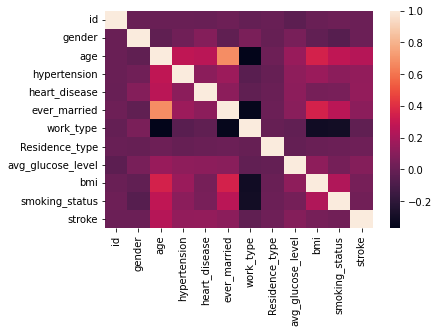

In [9]:
plt.plot(figsize=(15,15))
sns.heatmap(df.corr())

In [10]:
#drop target columns
drop_col = ['stroke']
#dataset containing the features columns
x_feat = df.iloc[:,0:10] #independent variable (predictors)
y_tar = df['stroke'] # target feature column
best_feat = SelectKBest(score_func = f_classif, k='all')
features_fitted = best_feat.fit(x_feat, y_tar)
df_scores = pd.DataFrame(features_fitted.scores_)
df_columns = pd.DataFrame(x_feat.columns)

In [11]:
feature_scores = pd.concat([df_columns , df_scores], axis =1)
feature_scores.columns = ['Features','Score']
#sorting the feature dataframe based on score values
feature_scores.sort_values(by='Score',ascending=False)
feature_scores

,Features,Score
0,id,0.215766
1,gender,0.407266
2,age,318.094573
3,hypertension,84.953542
4,heart_disease,94.698406
5,ever_married,60.667230
6,work_type,5.340019
7,Residence_type,1.220842
8,avg_glucose_level,40.629589
9,bmi,9.159169


In [12]:
cols = feature_scores[feature_scores['Score']>9]['Features']
print('Choosen features : ','\n', cols)

Choosen features :  
 2                  age
3         hypertension
4        heart_disease
5         ever_married
8    avg_glucose_level
9                  bmi
Name: Features, dtype: object


In [13]:
x=df[cols].values
y=df['stroke'].values
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 50, test_size =0.3)

x_train.shape,x_test.shape,y_train.shape, y_test.shape


((3577, 6), (1533, 6), (3577,), (1533,))

In [15]:
acc_val = []
f1_val = []
macc_val = []

## Model Building

#### KNN

In [16]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
for n in range (1,ks):
 neg = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
 ypred_knn = neg.predict(x_test)
 mean_acc[n-1]= metrics.accuracy_score(y_test, ypred_knn)
 std_acc[n-1]= np.std(ypred_knn==y_test)/np.sqrt(ypred_knn.shape[0])
print(' Best accuracy of %.3f '%mean_acc.max(), 'was with k = ', mean_acc.argmax())

 Best accuracy of 0.956  was with k =  5


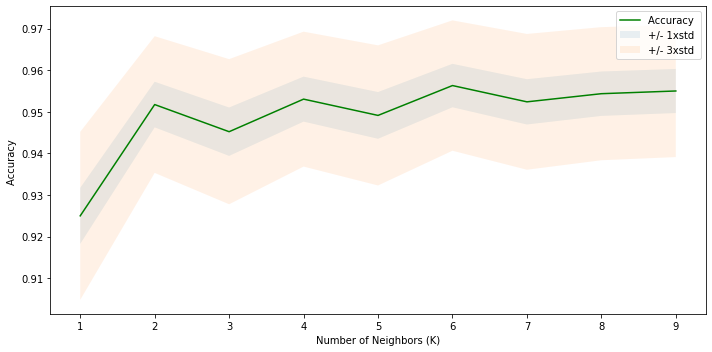

In [17]:
plt.figure(figsize=(10,5))
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [18]:
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
train_scores= metrics.accuracy_score(y_train, knn.predict(x_train))
test_scores= metrics.accuracy_score(y_test, knn.predict(x_test))
print(' Train-set accuracy with k=5 is: %.3f'%train_scores)
print(' Test-set accuracy with k=5 is: %.3f'%test_scores)
k_acc = metrics.accuracy_score(y_test, ypred_knn)
acc_val.append(k_acc)


 Train-set accuracy with k=5 is: 0.952
 Test-set accuracy with k=5 is: 0.949


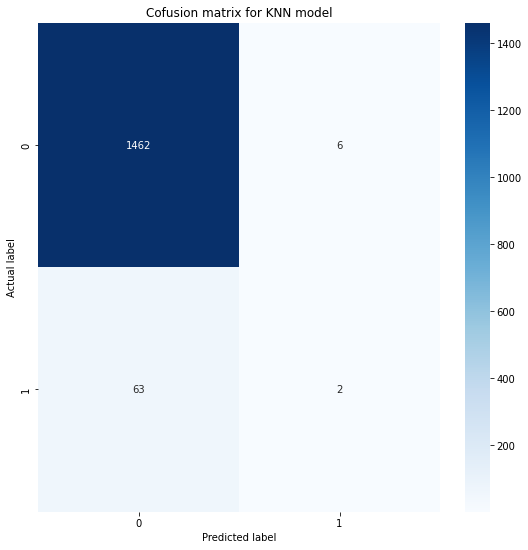

In [19]:
plt.figure(figsize=(9, 9))
ax = plt.subplot()
cm = confusion_matrix(y_test,ypred_knn)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
ax.set_title('Cofusion matrix for KNN model')
plt.show()

In [20]:

np.set_printoptions(precision=2)
t_n = ['Stroke = 0', 'Stroke = 1']
print('\n',"Classification report for KNN classifier")




 Classification report for KNN classifier


In [21]:
print(classification_report(y_test, ypred_knn, labels=[0,1], target_names=t_n))
print("Accuracy of The Model :",accuracy_score(y_test,ypred_knn)*100)

              precision    recall  f1-score   support

  Stroke = 0       0.96      1.00      0.98      1468
  Stroke = 1       0.25      0.03      0.05        65

    accuracy                           0.95      1533
   macro avg       0.60      0.51      0.52      1533
weighted avg       0.93      0.95      0.94      1533

Accuracy of The Model : 95.49902152641879
